# check the distribution across differing Zs

In [ ]:

# import stuff
import sys,os,os.path
import csv
import traceback
#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/scratch/halmazan/NEXT/IC_alter-blob-centre/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/scratch/halmazan/NEXT/testing/notebooks/FOM_creator/")
os.environ['ICTDIR']='/scratch/halmazan/NEXT/IC_alter-blob-centre/'

from invisible_cities.core.core_functions   import shift_to_bin_centers
from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer

import FOM_functions as FOM_func
import functions_HE as func
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd





import scipy.special as special
from scipy.stats import norm
from scipy.stats import skewnorm, crystalball
from scipy.optimize import curve_fit
from tqdm import tqdm

from scipy.integrate import quad

import iminuit
from iminuit import Minuit
import probfit
from concurrent.futures import ProcessPoolExecutor

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

from concurrent.futures import ProcessPoolExecutor

import sys,os,os.path
from pathlib import Path

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.core                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
#from invisible_cities.cities.beersheba    import hitc_to_df_
from invisible_cities.io.hits_io          import hits_from_df
from invisible_cities.evm.nh5             import HitsTable
from invisible_cities.types.symbols       import NormStrategy
from invisible_cities.types.ic_types      import NoneType
from invisible_cities.reco.corrections    import read_maps, get_df_to_z_converter, apply_all_correction
from invisible_cities.evm.event_model     import HitCollection

from tqdm import tqdm



In [ ]:
# read in the thekla topological data
FOM_TS = ['456018']
TIMESTAMP = FOM_TS
RUN_NUMBER = '250925'
RUN_NUMBER = [int(x) for x in RUN_NUMBER.split(',')]
# make directory
n100_dir = f'/data/halmazan/NEXT/N100_LPR_MC/{RUN_NUMBER[0]}/thekla/{FOM_TS[0]}/'
# load
hdst_local = []

for ldc in tqdm(range(1,8)):
    folder_path = f'{n100_dir}ldc{ldc}/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    for file in file_names:
        try:
            hdst_single = load_dst(os.path.join(folder_path, file), 'Tracking', 'Tracks')
        except Exception as e:
            print(f'Broke: {e}')
    
        hdst_local.append(hdst_single)


    print(f'Loaded!', flush = True)
hdst = pd.concat(hdst_local)
 

  0%|                                                                                                                                                                                        | 0/7 [00:00<?, ?it/s]

Broke: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1652, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 632, in H5F__super_read
    truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048

End of HDF5 error back trace

Unable to open/create file '/data/halmazan/NEXT/N100_LPR_MC/250925/thekla/456018/ldc1/NEXT100_Tl208_Port1a_sophronia_873_thekla.h5'
Loaded!


 14%|█████████████████████████▏                                                                                                                                                      | 1/7 [00:46<04:39, 46.52s/it]

Broke: group ``/`` does not have a child named ``Tracking``
Loaded!


 29%|██████████████████████████████████████████████████▎                                                                                                                             | 2/7 [01:31<03:49, 45.83s/it]

Broke: group ``/`` does not have a child named ``Tracking``
Loaded!


 43%|███████████████████████████████████████████████████████████████████████████▍                                                                                                    | 3/7 [02:33<03:32, 53.04s/it]

Broke: group ``/`` does not have a child named ``Tracking``
Broke: group ``/`` does not have a child named ``Tracking``
Broke: group ``/`` does not have a child named ``Tracking``
Broke: HDF5 error back trace

  File "H5F.c", line 509, in H5Fopen
    unable to open file
  File "H5Fint.c", line 1652, in H5F_open
    unable to read superblock
  File "H5Fsuper.c", line 632, in H5F__super_read
    truncated file: eof = 96, sblock->base_addr = 0, stored_eof = 2048

End of HDF5 error back trace

Unable to open/create file '/data/halmazan/NEXT/N100_LPR_MC/250925/thekla/456018/ldc4/NEXT100_Tl208_Port1a_sophronia_6526_thekla.h5'
Broke: group ``/`` does not have a child named ``Tracking``
Loaded!


 57%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                           | 4/7 [04:01<03:20, 66.92s/it]

Loaded!


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                  | 5/7 [05:28<02:28, 74.15s/it]

Loaded!


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 6/7 [06:46<01:15, 75.25s/it]

Loaded!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [08:04<00:00, 69.25s/it]


In [ ]:
display(hdst)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,226716000,0,1.966007,280.416726,329,1100,1,73.175,91.425,372.745573,...,381.467226,134.375000,260.475,427.684863,0.446946,0.377586,0.000000,17.788462,17.523333,15.531702
1,226716001,0,2.165926,583.355390,329,1153,2,-312.575,-202.025,79.621088,...,230.593206,-50.225000,-47.525,268.004372,0.521667,0.251250,0.000000,17.975000,17.873684,17.764127
2,226716001,1,0.124580,135.123589,20,56,2,-173.625,353.775,553.443377,...,587.959917,-112.425000,430.525,559.994640,0.090782,0.034602,0.008093,17.975000,17.873684,17.764127
3,226716002,0,1.803116,280.407751,305,950,2,26.525,-47.525,294.617181,...,358.923548,134.375000,137.075,412.630528,0.416549,0.187730,0.000000,17.490000,17.490000,17.993416
4,226716002,1,0.123967,42.224595,7,42,2,243.225,-16.925,781.488429,...,790.864176,274.419254,-16.925,790.864176,0.123967,0.123967,0.123967,17.490000,17.490000,17.993416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,131328096,0,1.239346,221.094220,190,577,1,288.875,184.225,437.122990,...,558.801663,366.625000,260.975,443.965811,0.779299,0.177374,0.000000,17.368750,17.243750,16.163310
148,131328097,0,1.300417,201.159093,207,710,1,-467.075,137.575,835.456324,...,863.974043,-373.775000,245.425,950.517347,0.840265,0.238849,0.000000,17.368750,17.005000,17.824591
149,131328098,0,1.596028,239.361425,301,977,1,-220.275,-233.125,594.763646,...,653.282659,-158.075000,-155.375,619.121331,0.567716,0.525033,0.000000,16.669231,17.368750,16.785376
150,131328099,0,1.045436,186.119921,180,560,1,304.425,184.225,686.770986,...,783.915934,366.625000,292.075,710.694017,0.472419,0.340423,0.000000,17.368750,16.905000,17.795990


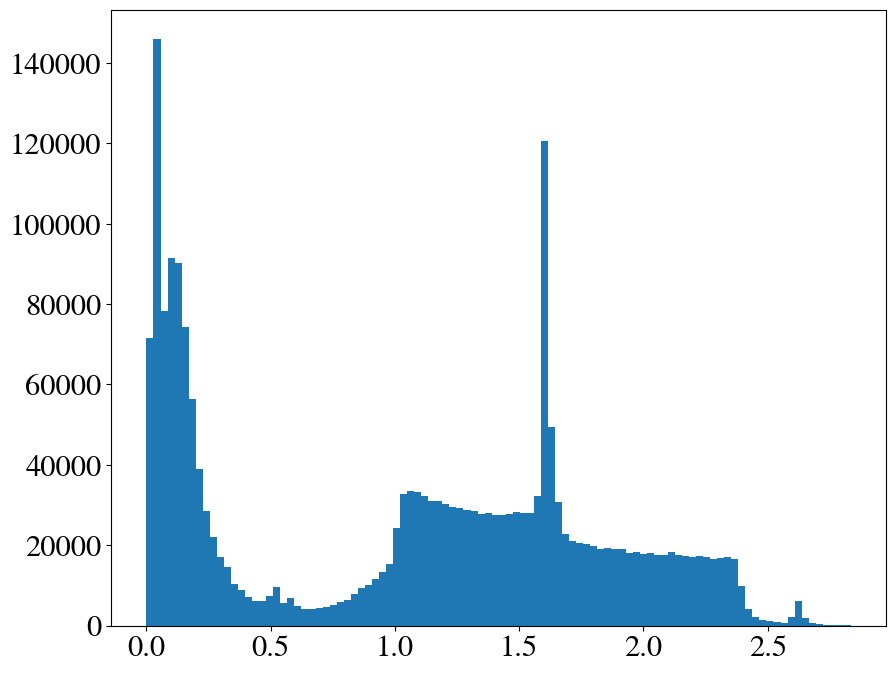

In [ ]:
plt.hist(hdst.energy.values, bins = 100)
plt.show()

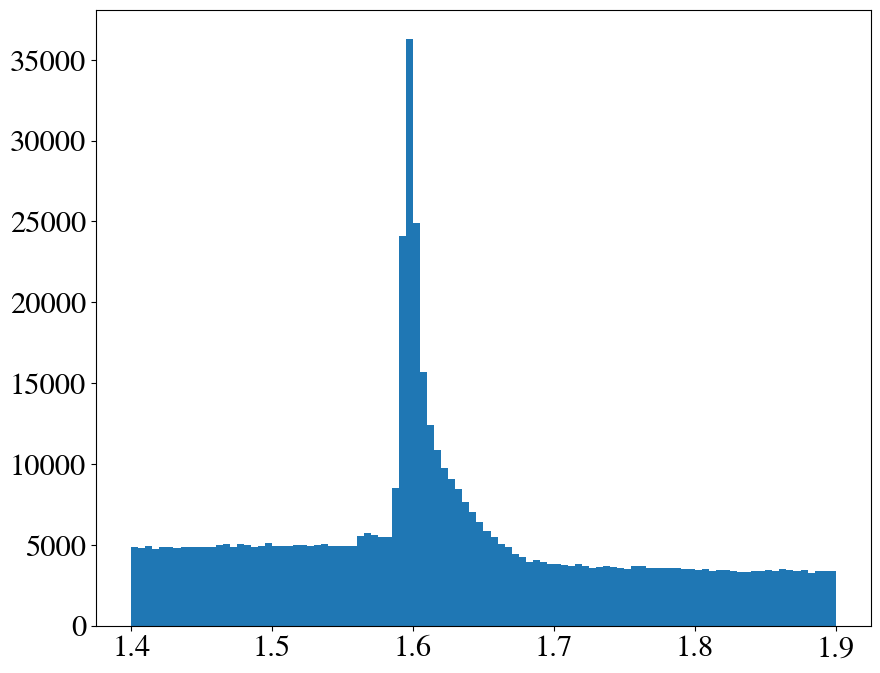

In [ ]:
plt.hist(hdst.energy.values, bins = 100, range = (1.4, 1.9))
plt.show()

In [ ]:
!pwd
!ls ../testing/notebooks/MC_truth_FOM/plots/

/scratch/halmazan/NEXT/testing/notebooks


ls: cannot access '../testing/notebooks/MC_truth_FOM/plots/': No such file or directory


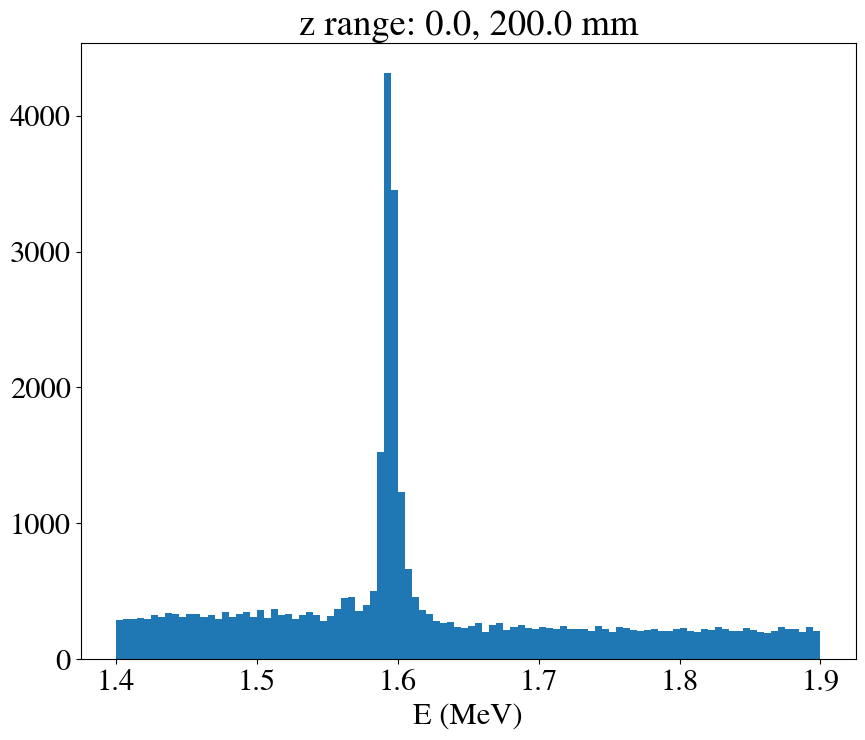

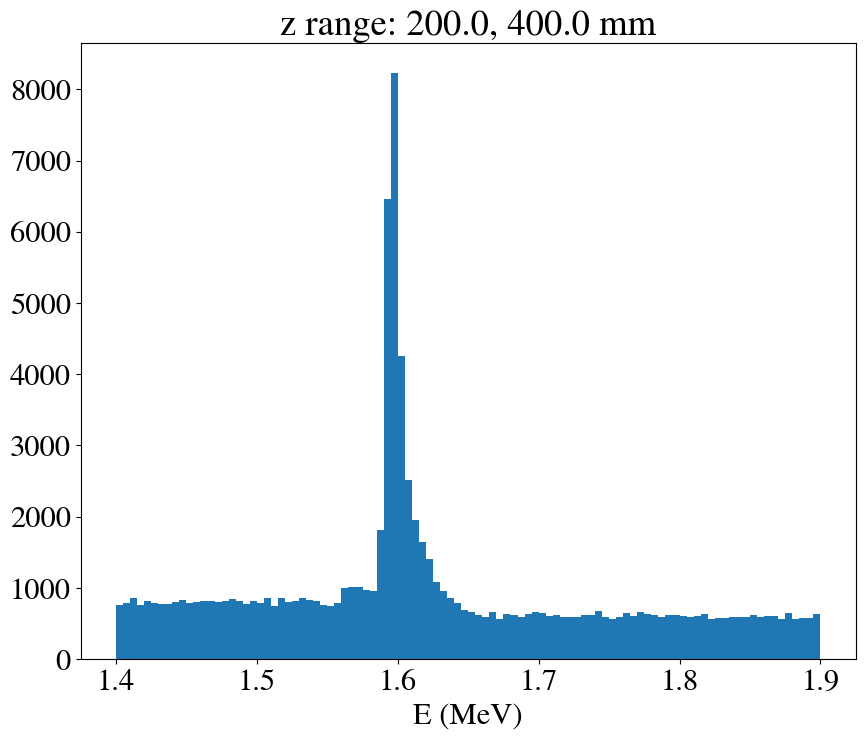

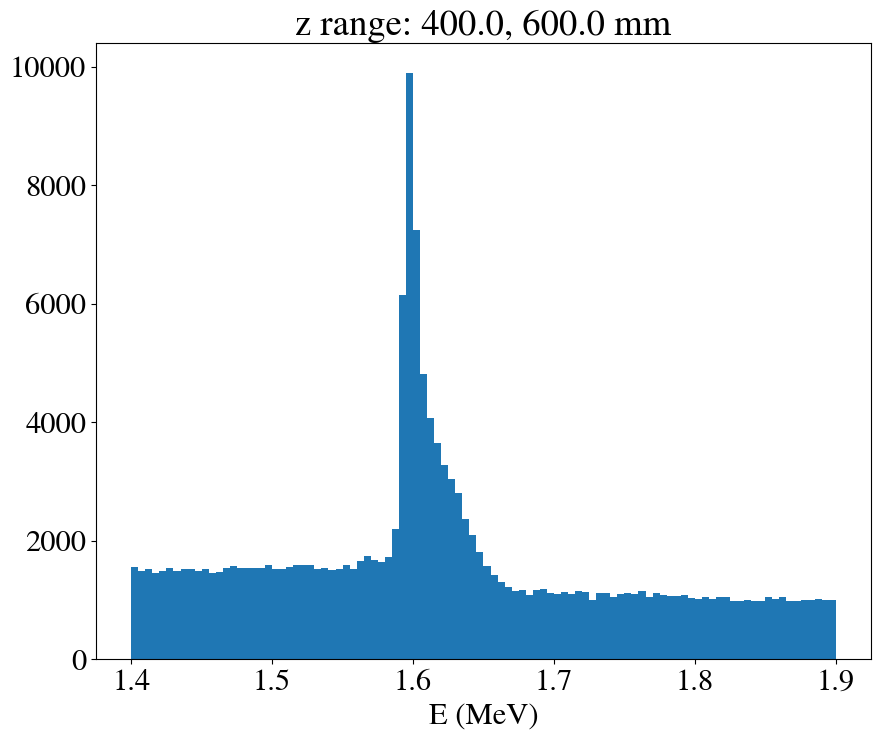

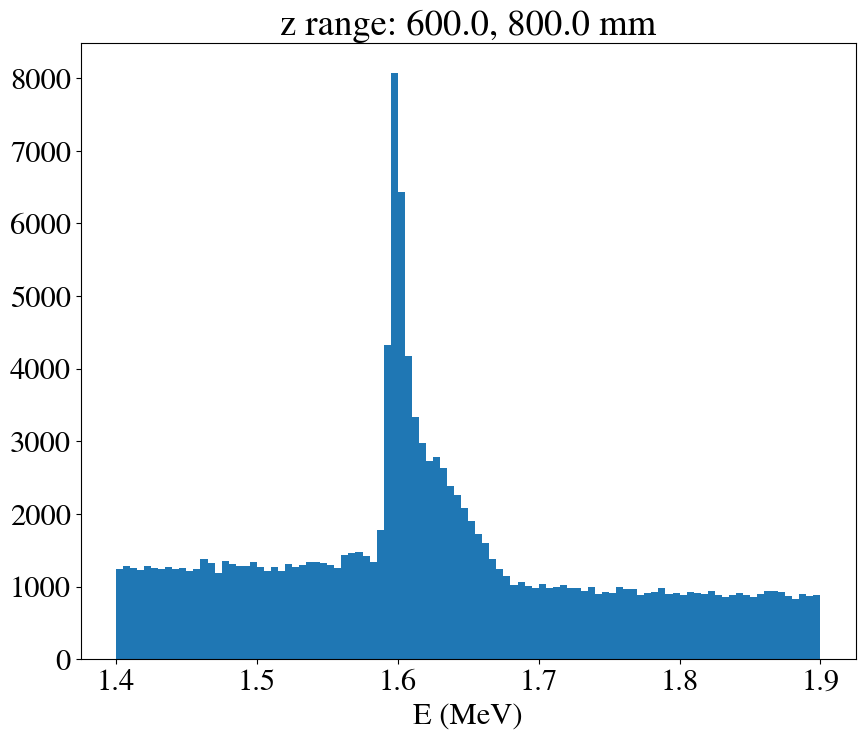

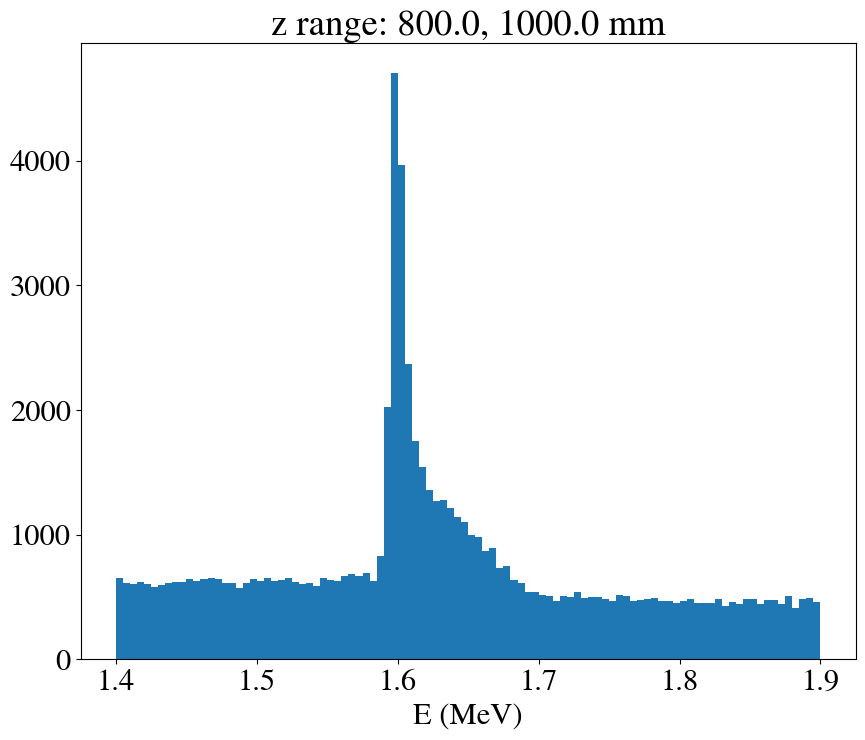

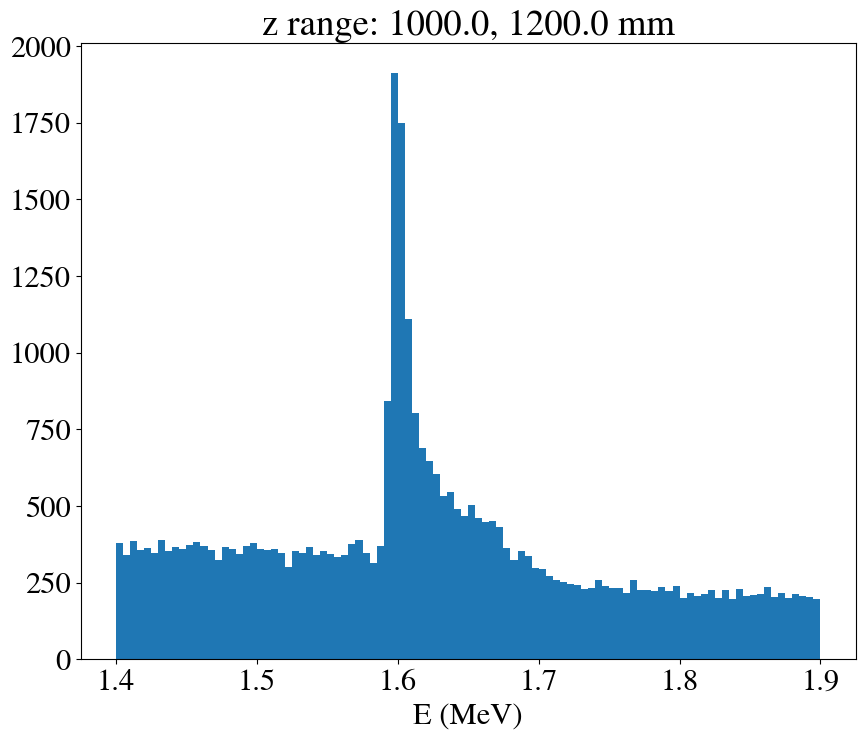

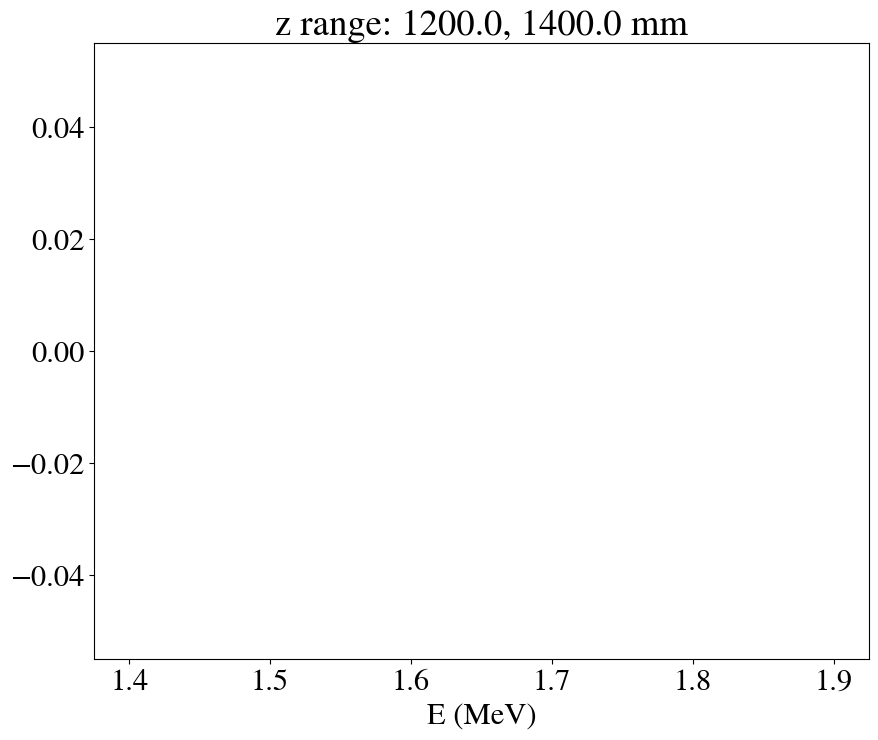

In [ ]:
z_average = 200

def plot_Edist_wrt_z(z_average_min, z_average_max, save = None):
    evts = hdst[(hdst.z_ave > z_average_min) & (hdst.z_ave < z_average_max)]
    plt.hist(evts.energy.values, bins=100, range=(1.4, 1.9))
    plt.title(f'z range: {z_average_min}, {z_average_max} mm')
    plt.xlabel('E (MeV)')

    if save is not None:
        plt.savefig(save)
    plt.show()


event_groups = {}
for i, j in zip(np.linspace(0, 1400, 8), np.linspace(200, 1400, 7)):
    plot_Edist_wrt_z(i, j)#, save = f'../testing/notebooks/MC_truth_FOM/plots/{i}mm.png')
    # take all events that have the z_average between i and j and put their names in a dictionary
    event_groups[f'{i}-{j}'] = hdst[(hdst.z_ave > i) & (hdst.z_ave < j)].event.unique()
#plot_Edist_wrt_z(200)
#plot_Edist_wrt_z(400)


In [ ]:
print(event_groups)
print(event_groups['0.0-200.0'])

{'0.0-200.0': array([226716001, 226716009, 226716013, ..., 131328082, 131328083,
       131328091]), '200.0-400.0': array([226716002, 226716012, 226716015, ..., 131328091, 131328092,
       131328095]), '400.0-600.0': array([226716000, 226716001, 226716003, ..., 131328094, 131328096,
       131328100]), '600.0-800.0': array([226716002, 226716004, 226716006, ..., 131328090, 131328098,
       131328099]), '800.0-1000.0': array([226716006, 226716008, 226716009, ..., 131328077, 131328079,
       131328097]), '1000.0-1200.0': array([226716016, 226716021, 226716029, ..., 131328064, 131328070,
       131328085]), '1200.0-1400.0': array([], dtype=int64)}
[226716001 226716009 226716013 ... 131328082 131328083 131328091]


In [ ]:
for gr in event_groups:
    print(gr)
    print(event_groups[gr])

0.0-200.0
[226716001 226716009 226716013 ... 131328082 131328083 131328091]
200.0-400.0
[226716002 226716012 226716015 ... 131328091 131328092 131328095]
400.0-600.0
[226716000 226716001 226716003 ... 131328094 131328096 131328100]
600.0-800.0
[226716002 226716004 226716006 ... 131328090 131328098 131328099]
800.0-1000.0
[226716006 226716008 226716009 ... 131328077 131328079 131328097]
1000.0-1200.0
[226716016 226716021 226716029 ... 131328064 131328070 131328085]
1200.0-1400.0
[]


In [ ]:
del hdst

In [ ]:
from PIL import Image
import os

# Directory containing the plots
plot_dir = '../testing/notebooks/MC_truth_FOM/plots/'

# Get all image files in the directory
image_files = sorted([os.path.join(plot_dir, f) for f in os.listdir(plot_dir) if f.endswith('.png')], key=lambda x: float(os.path.basename(x).replace('mm.png', '')))

# Create a list of images
images = [Image.open(img) for img in image_files]

# Save as GIF
gif_path = '../testing/notebooks/MC_truth_FOM/plots/animation_2.gif'
images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

print(f"GIF saved at {gif_path}")

FileNotFoundError: [Errno 2] No such file or directory: '../testing/notebooks/MC_truth_FOM/plots/'

# extract the nexus true information of these events

In [ ]:
!pwd

/scratch/halmazan/NEXT/testing/notebooks


In [ ]:
# read in the thekla topological data
FOM_TS = ['456018']
TIMESTAMP = FOM_TS
RUN_NUMBER = '250925'
RUN_NUMBER = [int(x) for x in RUN_NUMBER.split(',')]
# make directory
n100_dir = f'/data/halmazan/NEXT/N100_LPR_MC/{RUN_NUMBER[0]}/nexus/'
# load
nexus_groups = {}

stopper = 1000

folder_path = f'{n100_dir}'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
for i, file in tqdm(enumerate(file_names)):
    try:
        hdst_single = load_dst(os.path.join(folder_path, file), 'MC', 'hits')
        # only take events from the relevant dictionary groups
        for gr in event_groups:
            if gr not in nexus_groups:
                nexus_groups[gr] = []
            matching_events = hdst_single[hdst_single.event_id.isin(event_groups[gr])]
            # sum 
            energy_single = matching_events.groupby('event_id').energy.sum().values
            nexus_groups[gr].append(energy_single)
        

    except Exception as e:
        print(f'Broke: {e}')
    if i > stopper:
        break

    


    print(f'Loaded!', flush = True)

print(nexus_groups)
np.save('MC_truth_FOM/nexus_groups', nexus_groups)

0it [00:00, ?it/s]

Loaded!


1it [00:00,  2.11it/s]

Loaded!


2it [00:00,  2.16it/s]

Loaded!


3it [00:01,  2.21it/s]

Loaded!


4it [00:01,  2.22it/s]

Loaded!


5it [00:02,  2.26it/s]

Loaded!


6it [00:02,  2.24it/s]

Loaded!


7it [00:03,  2.19it/s]

Loaded!


8it [00:03,  2.24it/s]

Loaded!


9it [00:04,  2.22it/s]

Loaded!


10it [00:04,  2.20it/s]

Loaded!


11it [00:04,  2.23it/s]

Loaded!


12it [00:05,  2.26it/s]

Loaded!


13it [00:05,  2.22it/s]

Loaded!


14it [00:06,  2.22it/s]

Loaded!


15it [00:06,  2.20it/s]

Loaded!


16it [00:07,  2.18it/s]

Loaded!


17it [00:07,  2.20it/s]

Loaded!


18it [00:08,  2.09it/s]

Loaded!


19it [00:08,  2.05it/s]

Loaded!


20it [00:09,  2.03it/s]

Loaded!


21it [00:09,  2.03it/s]

Loaded!


22it [00:10,  2.02it/s]

Loaded!


23it [00:10,  2.02it/s]

Loaded!


24it [00:11,  2.05it/s]

Loaded!


25it [00:11,  2.02it/s]

Loaded!


26it [00:12,  1.93it/s]

Loaded!


27it [00:12,  2.00it/s]

Loaded!


28it [00:13,  2.06it/s]

Loaded!


29it [00:13,  2.09it/s]

Loaded!


30it [00:14,  2.10it/s]

Loaded!


31it [00:14,  2.12it/s]

Loaded!


32it [00:15,  2.15it/s]

Loaded!


33it [00:15,  2.27it/s]

Loaded!


34it [00:15,  2.36it/s]

Loaded!


35it [00:16,  2.45it/s]

Loaded!


36it [00:16,  2.37it/s]

Loaded!


37it [00:17,  2.27it/s]

Loaded!


38it [00:17,  2.24it/s]

Loaded!


39it [00:18,  2.25it/s]

Loaded!


40it [00:18,  2.23it/s]

Loaded!


41it [00:18,  2.22it/s]

Loaded!


42it [00:19,  2.21it/s]

Loaded!


43it [00:19,  2.20it/s]

Loaded!


44it [00:20,  2.19it/s]

Loaded!


45it [00:20,  2.19it/s]

Loaded!


46it [00:21,  2.18it/s]

Loaded!


47it [00:21,  2.28it/s]

Loaded!


48it [00:22,  2.25it/s]

Loaded!


49it [00:22,  2.34it/s]

Loaded!


50it [00:22,  2.43it/s]

Loaded!


51it [00:23,  2.33it/s]

Loaded!


52it [00:23,  2.30it/s]

Loaded!


53it [00:24,  2.23it/s]

Loaded!


54it [00:24,  2.21it/s]

Loaded!


55it [00:25,  2.20it/s]

Loaded!


56it [00:25,  2.22it/s]

Loaded!


57it [00:26,  2.24it/s]

Loaded!


58it [00:26,  2.11it/s]

Loaded!


59it [00:27,  2.12it/s]

Loaded!


60it [00:27,  2.19it/s]

Loaded!


61it [00:27,  2.18it/s]

Loaded!


62it [00:28,  2.20it/s]

Loaded!


63it [00:28,  2.20it/s]

Loaded!


64it [00:29,  2.20it/s]

Loaded!


65it [00:29,  2.20it/s]

Loaded!


66it [00:30,  2.19it/s]

Loaded!


67it [00:30,  2.18it/s]

Loaded!


68it [00:31,  2.18it/s]

Loaded!


69it [00:31,  2.20it/s]

Loaded!


70it [00:32,  2.15it/s]

Loaded!


71it [00:32,  2.24it/s]

Loaded!


72it [00:32,  2.23it/s]

Loaded!


73it [00:33,  2.21it/s]

Loaded!


74it [00:33,  2.30it/s]

Loaded!


75it [00:34,  2.28it/s]

Loaded!


76it [00:34,  2.25it/s]

Loaded!


77it [00:35,  2.25it/s]

Loaded!


78it [00:35,  2.25it/s]

Loaded!


79it [00:36,  2.23it/s]

Loaded!


80it [00:36,  2.22it/s]

Loaded!


81it [00:36,  2.29it/s]

Loaded!


82it [00:37,  2.37it/s]

Loaded!


83it [00:37,  2.35it/s]

Loaded!


84it [00:38,  2.16it/s]

Loaded!


85it [00:38,  2.16it/s]

Loaded!


86it [00:39,  2.17it/s]

Loaded!


87it [00:39,  2.17it/s]

Loaded!


88it [00:40,  2.18it/s]

Loaded!


89it [00:40,  2.26it/s]

Loaded!


90it [00:40,  2.24it/s]

Loaded!


91it [00:41,  2.32it/s]

Loaded!


92it [00:41,  2.28it/s]

Loaded!


93it [00:42,  2.26it/s]

Loaded!


94it [00:42,  2.29it/s]

Loaded!


95it [00:43,  2.21it/s]

Loaded!


96it [00:43,  2.15it/s]

Loaded!


97it [00:44,  2.10it/s]

Loaded!


98it [00:44,  2.08it/s]

Loaded!


99it [00:45,  2.09it/s]

Loaded!


100it [00:45,  2.05it/s]

Loaded!


101it [00:46,  2.12it/s]

Loaded!


102it [00:46,  2.04it/s]

Loaded!


103it [00:47,  2.10it/s]

Loaded!


104it [00:47,  2.08it/s]

Loaded!


105it [00:48,  1.99it/s]

Loaded!


106it [00:48,  1.97it/s]

Loaded!


107it [00:49,  2.03it/s]

Loaded!


108it [00:49,  2.03it/s]

Loaded!


109it [00:50,  2.07it/s]

Loaded!


110it [00:50,  2.19it/s]

Loaded!


111it [00:50,  2.28it/s]

Loaded!


112it [00:51,  2.23it/s]

Loaded!


113it [00:51,  2.16it/s]

Loaded!


114it [00:52,  2.17it/s]

Loaded!


115it [00:52,  2.19it/s]

Loaded!


116it [00:53,  2.18it/s]

Loaded!


117it [00:53,  2.20it/s]

Loaded!


118it [00:54,  2.18it/s]

Loaded!


119it [00:54,  2.17it/s]

Loaded!


120it [00:54,  2.15it/s]

Loaded!


121it [00:55,  2.16it/s]

Loaded!


122it [00:55,  2.14it/s]

Loaded!


123it [00:56,  2.25it/s]

Loaded!


124it [00:56,  2.21it/s]

Loaded!


125it [00:57,  2.21it/s]

Loaded!


126it [00:57,  2.22it/s]

Loaded!


127it [00:58,  2.22it/s]

Loaded!


128it [00:58,  2.22it/s]

Loaded!


129it [00:59,  2.20it/s]

Loaded!


130it [00:59,  2.20it/s]

Loaded!


131it [00:59,  2.24it/s]

Loaded!


132it [01:00,  2.22it/s]

Loaded!


133it [01:00,  2.24it/s]

Loaded!


134it [01:01,  2.28it/s]

Loaded!


135it [01:01,  2.27it/s]

Loaded!


136it [01:02,  2.14it/s]

Loaded!


137it [01:02,  2.10it/s]

Loaded!


138it [01:03,  2.07it/s]

Loaded!


139it [01:03,  2.08it/s]

Loaded!


140it [01:04,  2.05it/s]

Loaded!


141it [01:04,  2.07it/s]

Loaded!


142it [01:05,  2.01it/s]

Loaded!


143it [01:05,  2.06it/s]

Loaded!


144it [01:06,  2.10it/s]

Loaded!


145it [01:06,  2.12it/s]

Loaded!


146it [01:07,  2.04it/s]

Loaded!


147it [01:07,  2.10it/s]

Loaded!


148it [01:07,  2.17it/s]

Loaded!


149it [01:08,  2.19it/s]

Loaded!


150it [01:08,  2.20it/s]

Loaded!


151it [01:09,  2.31it/s]

Loaded!


152it [01:09,  2.30it/s]

Loaded!


153it [01:10,  2.36it/s]

Loaded!


154it [01:10,  2.28it/s]

Loaded!


155it [01:11,  2.26it/s]

Loaded!


156it [01:11,  2.25it/s]

Loaded!


157it [01:11,  2.25it/s]

Loaded!


158it [01:12,  2.31it/s]

Loaded!


159it [01:12,  2.31it/s]

Loaded!


160it [01:13,  2.29it/s]

Loaded!


161it [01:13,  2.26it/s]

Loaded!


162it [01:14,  2.29it/s]

Loaded!


163it [01:14,  2.27it/s]

Loaded!


164it [01:15,  2.18it/s]

Loaded!


165it [01:15,  2.18it/s]

Loaded!


166it [01:15,  2.22it/s]

Loaded!


167it [01:16,  2.28it/s]

Loaded!


168it [01:16,  2.25it/s]

Loaded!


169it [01:17,  2.24it/s]

Loaded!


170it [01:17,  2.30it/s]

Loaded!


171it [01:18,  2.26it/s]

Loaded!


172it [01:18,  2.23it/s]

Loaded!


173it [01:19,  2.21it/s]

Loaded!


174it [01:19,  2.21it/s]

Loaded!


175it [01:19,  2.21it/s]

Loaded!


176it [01:20,  2.21it/s]

Loaded!


177it [01:20,  2.22it/s]

Loaded!


178it [01:21,  2.17it/s]

Loaded!


179it [01:21,  2.07it/s]

Loaded!


180it [01:22,  2.08it/s]

Loaded!


181it [01:22,  2.11it/s]

Loaded!


182it [01:23,  2.12it/s]

Loaded!


183it [01:23,  2.14it/s]

Loaded!


184it [01:24,  2.13it/s]

Loaded!


185it [01:24,  2.12it/s]

Loaded!


186it [01:25,  2.14it/s]

Loaded!


187it [01:25,  2.12it/s]

Loaded!


188it [01:26,  2.17it/s]

Loaded!


189it [01:26,  2.14it/s]

Loaded!


190it [01:26,  2.17it/s]

Loaded!


191it [01:27,  2.27it/s]

Loaded!


192it [01:27,  2.25it/s]

Loaded!


193it [01:28,  2.24it/s]

Loaded!


194it [01:28,  2.22it/s]

Loaded!


195it [01:29,  2.25it/s]

Loaded!


196it [01:29,  2.21it/s]

Loaded!


197it [01:30,  2.20it/s]

Loaded!


198it [01:30,  2.19it/s]

Loaded!


199it [01:30,  2.21it/s]

Loaded!


200it [01:31,  2.22it/s]

Loaded!


201it [01:31,  2.29it/s]

Loaded!


202it [01:32,  2.26it/s]

Loaded!


203it [01:32,  2.23it/s]

Loaded!


204it [01:33,  2.22it/s]

Loaded!


205it [01:33,  2.20it/s]

Loaded!


206it [01:34,  2.12it/s]

Loaded!


207it [01:34,  2.14it/s]

Loaded!


208it [01:35,  2.16it/s]

Loaded!


209it [01:35,  2.17it/s]

Loaded!


210it [01:35,  2.26it/s]

Loaded!


211it [01:36,  2.22it/s]

Loaded!


212it [01:36,  2.32it/s]

Loaded!


213it [01:37,  2.41it/s]

Loaded!


214it [01:37,  2.36it/s]

Loaded!


215it [01:38,  2.34it/s]

Loaded!


216it [01:38,  2.29it/s]

Loaded!


217it [01:38,  2.24it/s]

Loaded!


218it [01:39,  2.24it/s]

Loaded!


219it [01:39,  2.26it/s]

Loaded!


220it [01:40,  2.25it/s]

Loaded!


221it [01:40,  2.22it/s]

Loaded!


222it [01:41,  2.30it/s]

Loaded!


223it [01:41,  2.29it/s]

Loaded!


224it [01:42,  2.23it/s]

Loaded!


225it [01:42,  2.32it/s]

Loaded!


226it [01:42,  2.26it/s]

Loaded!


227it [01:43,  2.38it/s]

Loaded!


228it [01:43,  2.30it/s]

Loaded!


229it [01:44,  2.20it/s]

Loaded!


230it [01:44,  2.13it/s]

Loaded!


231it [01:45,  2.10it/s]

Loaded!


232it [01:45,  2.09it/s]

Loaded!


233it [01:46,  2.06it/s]

Loaded!


234it [01:46,  2.11it/s]

Loaded!


235it [01:47,  1.98it/s]

Loaded!


236it [01:47,  2.01it/s]

Loaded!


237it [01:48,  2.01it/s]

Loaded!


238it [01:48,  2.07it/s]

Loaded!


239it [01:49,  2.06it/s]

Loaded!


240it [01:49,  2.06it/s]

Loaded!


241it [01:50,  2.11it/s]

Loaded!


242it [01:50,  2.12it/s]

Loaded!


243it [01:51,  2.17it/s]

Loaded!


244it [01:51,  2.18it/s]

Loaded!


245it [01:51,  2.20it/s]

Loaded!


246it [01:52,  2.21it/s]

Loaded!


247it [01:52,  2.28it/s]

Loaded!


248it [01:53,  2.26it/s]

Loaded!


249it [01:53,  2.22it/s]

Loaded!


250it [01:54,  2.20it/s]

Loaded!


251it [01:54,  2.22it/s]

Loaded!


252it [01:55,  2.22it/s]

Loaded!


253it [01:55,  2.21it/s]

Loaded!


254it [01:55,  2.33it/s]

Loaded!


255it [01:56,  2.17it/s]

Loaded!


256it [01:56,  2.22it/s]

Loaded!


257it [01:57,  2.21it/s]

Loaded!


258it [01:57,  2.21it/s]

Loaded!


259it [01:58,  2.18it/s]

Loaded!


260it [01:58,  2.14it/s]

Loaded!


261it [01:59,  2.13it/s]

Loaded!


262it [01:59,  2.09it/s]

Loaded!


263it [02:00,  2.09it/s]

Loaded!


264it [02:00,  2.10it/s]

Loaded!


265it [02:01,  2.11it/s]

Loaded!


266it [02:01,  2.16it/s]

Loaded!


267it [02:02,  2.14it/s]

Loaded!


268it [02:02,  2.16it/s]

Loaded!


269it [02:03,  2.12it/s]

Loaded!


270it [02:03,  2.15it/s]

Loaded!


271it [02:03,  2.16it/s]

Loaded!


272it [02:04,  2.14it/s]

Loaded!


273it [02:04,  2.12it/s]

Loaded!


274it [02:05,  2.12it/s]

Loaded!


275it [02:05,  2.15it/s]

Loaded!


276it [02:06,  2.17it/s]

Loaded!


277it [02:06,  2.18it/s]

Loaded!


278it [02:07,  2.18it/s]

Loaded!


279it [02:07,  2.18it/s]

Loaded!


280it [02:08,  2.19it/s]

Loaded!


281it [02:08,  2.30it/s]

Loaded!


282it [02:08,  2.27it/s]

Loaded!


283it [02:09,  2.24it/s]

Loaded!


284it [02:09,  2.23it/s]

Loaded!


285it [02:10,  2.21it/s]

Loaded!


286it [02:10,  2.21it/s]

Loaded!


287it [02:11,  2.22it/s]

Loaded!


288it [02:11,  2.25it/s]

Loaded!


289it [02:12,  2.22it/s]

Loaded!


290it [02:12,  2.11it/s]

Loaded!


291it [02:13,  2.05it/s]

Loaded!


292it [02:13,  2.11it/s]

Loaded!


293it [02:14,  2.12it/s]

Loaded!


294it [02:14,  2.15it/s]

Loaded!


295it [02:14,  2.14it/s]

Loaded!


296it [02:15,  2.16it/s]

Loaded!


297it [02:15,  2.25it/s]

Loaded!


298it [02:16,  2.20it/s]

Loaded!


299it [02:16,  2.20it/s]

Loaded!


300it [02:17,  2.21it/s]

Loaded!


301it [02:17,  2.10it/s]

Loaded!


302it [02:18,  2.12it/s]

Loaded!


303it [02:18,  2.12it/s]

Loaded!


304it [02:19,  2.13it/s]

Loaded!


305it [02:19,  2.15it/s]

Loaded!


306it [02:20,  2.17it/s]

Loaded!


307it [02:20,  2.25it/s]

Loaded!


308it [02:20,  2.33it/s]

Loaded!


309it [02:21,  2.37it/s]

Loaded!


310it [02:21,  2.31it/s]

Loaded!


311it [02:22,  2.30it/s]

Loaded!


312it [02:22,  2.27it/s]

Loaded!


313it [02:23,  2.26it/s]

Loaded!


314it [02:23,  2.25it/s]

Loaded!


315it [02:23,  2.23it/s]

Loaded!


316it [02:24,  2.18it/s]

Loaded!


317it [02:24,  2.19it/s]

Loaded!


318it [02:25,  2.19it/s]

Loaded!


319it [02:25,  2.21it/s]

Loaded!


320it [02:26,  2.22it/s]

Loaded!


321it [02:26,  2.26it/s]

Loaded!


322it [02:27,  2.13it/s]

Loaded!


323it [02:27,  2.08it/s]

Loaded!


324it [02:28,  2.05it/s]

Loaded!


325it [02:28,  2.04it/s]

Loaded!


326it [02:29,  2.03it/s]

Loaded!


327it [02:29,  1.91it/s]

Loaded!


328it [02:30,  1.98it/s]

Loaded!


329it [02:30,  2.00it/s]

Loaded!


330it [02:31,  2.05it/s]

Loaded!


331it [02:31,  2.13it/s]

Loaded!


332it [02:32,  2.03it/s]

Loaded!


333it [02:32,  2.08it/s]

Loaded!


334it [02:33,  2.11it/s]

Loaded!


335it [02:33,  2.23it/s]

Loaded!


336it [02:33,  2.20it/s]

Loaded!


337it [02:34,  2.20it/s]

Loaded!


338it [02:34,  2.19it/s]

Loaded!


339it [02:35,  2.24it/s]

Loaded!


340it [02:35,  2.20it/s]

Loaded!


341it [02:36,  2.12it/s]

Loaded!


342it [02:36,  2.08it/s]

Loaded!


343it [02:37,  2.04it/s]

Loaded!


344it [02:37,  2.10it/s]

Loaded!


345it [02:38,  2.13it/s]

Loaded!


346it [02:38,  2.08it/s]

Loaded!


347it [02:39,  2.04it/s]

Loaded!


348it [02:39,  2.00it/s]

Loaded!


349it [02:40,  1.91it/s]

Loaded!


350it [02:40,  2.06it/s]

Loaded!


351it [02:41,  2.01it/s]

Loaded!


352it [02:41,  1.98it/s]

Loaded!


353it [02:42,  1.97it/s]

Loaded!


354it [02:42,  1.98it/s]

Loaded!


355it [02:43,  1.99it/s]

Loaded!


356it [02:43,  2.05it/s]

Loaded!


357it [02:44,  2.01it/s]

Loaded!


358it [02:44,  1.99it/s]

Loaded!


359it [02:45,  2.05it/s]

Loaded!


360it [02:45,  2.04it/s]

Loaded!


361it [02:46,  2.10it/s]

Loaded!


362it [02:46,  2.09it/s]

Loaded!


363it [02:47,  2.06it/s]

Loaded!


364it [02:47,  2.10it/s]

Loaded!


365it [02:48,  2.13it/s]

Loaded!


366it [02:48,  2.18it/s]

Loaded!


367it [02:48,  2.20it/s]

Loaded!


368it [02:49,  2.19it/s]

Loaded!


369it [02:49,  2.16it/s]

Loaded!


370it [02:50,  2.16it/s]

Loaded!


371it [02:50,  2.16it/s]

Loaded!


372it [02:51,  2.08it/s]

Loaded!


373it [02:51,  2.13it/s]

Loaded!


374it [02:52,  2.13it/s]

Loaded!


375it [02:52,  2.15it/s]

Loaded!


376it [02:53,  2.15it/s]

Loaded!


377it [02:53,  2.16it/s]

Loaded!


378it [02:54,  2.16it/s]

Loaded!


379it [02:54,  2.19it/s]

Loaded!


380it [02:54,  2.17it/s]

Loaded!


381it [02:55,  2.28it/s]

Loaded!


382it [02:55,  2.24it/s]

Loaded!


383it [02:56,  2.22it/s]

Loaded!


384it [02:56,  2.30it/s]

Loaded!


385it [02:57,  2.26it/s]

Loaded!


386it [02:57,  2.21it/s]

Loaded!


387it [02:58,  2.19it/s]

Loaded!


388it [02:58,  2.19it/s]

Loaded!


389it [02:59,  2.07it/s]

Loaded!


390it [02:59,  2.18it/s]

Loaded!


391it [02:59,  2.17it/s]

Loaded!


392it [03:00,  2.17it/s]

Loaded!


393it [03:00,  2.09it/s]

Loaded!


394it [03:01,  2.11it/s]

Loaded!


395it [03:01,  2.13it/s]

Loaded!


396it [03:02,  2.15it/s]

Loaded!


397it [03:02,  2.12it/s]

Loaded!


398it [03:03,  2.15it/s]

Loaded!


399it [03:03,  2.14it/s]

Loaded!


400it [03:04,  2.16it/s]

Loaded!


401it [03:04,  2.15it/s]

Loaded!


402it [03:05,  2.07it/s]

Loaded!


403it [03:05,  2.08it/s]

Loaded!


404it [03:06,  2.10it/s]

Loaded!


405it [03:06,  2.12it/s]

Loaded!


406it [03:06,  2.14it/s]

Loaded!


407it [03:07,  2.15it/s]

Loaded!


408it [03:07,  2.25it/s]

Loaded!


409it [03:08,  2.20it/s]

Loaded!


410it [03:08,  2.11it/s]

Loaded!


411it [03:09,  2.13it/s]

Loaded!


412it [03:09,  2.14it/s]

Loaded!


413it [03:10,  2.07it/s]

Loaded!


414it [03:10,  2.04it/s]

Loaded!


415it [03:11,  2.00it/s]

Loaded!


416it [03:11,  1.97it/s]

Loaded!


417it [03:12,  1.97it/s]

Loaded!


418it [03:12,  1.97it/s]

Loaded!


419it [03:13,  2.00it/s]

Loaded!


420it [03:13,  2.01it/s]

Loaded!


421it [03:14,  2.01it/s]

Loaded!


422it [03:14,  2.04it/s]

Loaded!


423it [03:15,  2.18it/s]

Loaded!


424it [03:15,  2.20it/s]

Loaded!


425it [03:16,  2.21it/s]

Loaded!


426it [03:16,  2.18it/s]

Loaded!


427it [03:17,  2.19it/s]

Loaded!


428it [03:17,  2.28it/s]

Loaded!


429it [03:17,  2.23it/s]

Loaded!


430it [03:18,  2.21it/s]

Loaded!


431it [03:18,  2.19it/s]

Loaded!


432it [03:19,  2.29it/s]

Loaded!


433it [03:19,  2.25it/s]

Loaded!


434it [03:20,  2.21it/s]

Loaded!


435it [03:20,  2.24it/s]

Loaded!


436it [03:21,  2.18it/s]

Loaded!


437it [03:21,  2.15it/s]

Loaded!


438it [03:21,  2.15it/s]

Loaded!


439it [03:22,  2.16it/s]

Loaded!


440it [03:22,  2.16it/s]

Loaded!


441it [03:23,  2.18it/s]

Loaded!


442it [03:23,  2.18it/s]

Loaded!


443it [03:24,  2.20it/s]

Loaded!


444it [03:24,  2.19it/s]

Loaded!


445it [03:25,  2.23it/s]

Loaded!


446it [03:25,  2.20it/s]

Loaded!


447it [03:26,  2.21it/s]

Loaded!


448it [03:26,  2.21it/s]

Loaded!


449it [03:27,  2.10it/s]

Loaded!


450it [03:27,  2.12it/s]

Loaded!


451it [03:27,  2.15it/s]

Loaded!


452it [03:28,  2.21it/s]

Loaded!


453it [03:28,  2.19it/s]

Loaded!


454it [03:29,  2.21it/s]

Loaded!


455it [03:29,  2.20it/s]

Loaded!


456it [03:30,  2.30it/s]

Loaded!


457it [03:30,  2.24it/s]

Loaded!


458it [03:31,  2.23it/s]

Loaded!


459it [03:31,  2.23it/s]

Loaded!


460it [03:31,  2.34it/s]

Loaded!


461it [03:32,  2.39it/s]

Loaded!


462it [03:32,  2.33it/s]

Loaded!


463it [03:33,  2.29it/s]

Loaded!


464it [03:33,  2.38it/s]

Loaded!


465it [03:34,  2.30it/s]

Loaded!


466it [03:34,  2.13it/s]

Loaded!


467it [03:35,  2.15it/s]

Loaded!


468it [03:35,  2.15it/s]

Loaded!


469it [03:35,  2.15it/s]

Loaded!


470it [03:36,  2.24it/s]

Loaded!


471it [03:36,  2.20it/s]

Loaded!


472it [03:37,  2.18it/s]

Loaded!


473it [03:37,  2.20it/s]

Loaded!


474it [03:38,  2.20it/s]

Loaded!


475it [03:38,  2.27it/s]

Loaded!


476it [03:39,  2.16it/s]

Loaded!


477it [03:39,  2.19it/s]

Loaded!


478it [03:39,  2.29it/s]

Loaded!


479it [03:40,  2.23it/s]

Loaded!


480it [03:40,  2.24it/s]

Loaded!


481it [03:41,  2.24it/s]

Loaded!


482it [03:41,  2.25it/s]

Loaded!


483it [03:42,  2.16it/s]

Loaded!


484it [03:42,  2.06it/s]

Loaded!


485it [03:43,  2.05it/s]

Loaded!


486it [03:43,  2.02it/s]

Loaded!


487it [03:44,  2.00it/s]

Loaded!


488it [03:44,  1.99it/s]

Loaded!


489it [03:45,  2.08it/s]

Loaded!


490it [03:45,  2.05it/s]

Loaded!


491it [03:46,  2.09it/s]

Loaded!


492it [03:46,  2.10it/s]

Loaded!


493it [03:47,  2.00it/s]

Loaded!


494it [03:47,  2.05it/s]

Loaded!


495it [03:48,  2.09it/s]

Loaded!


496it [03:48,  2.20it/s]

Loaded!


497it [03:49,  2.17it/s]

Loaded!


498it [03:49,  2.19it/s]

Loaded!


499it [03:49,  2.21it/s]

Loaded!


500it [03:50,  2.27it/s]

Loaded!


501it [03:50,  2.19it/s]

Loaded!


502it [03:51,  2.18it/s]

Loaded!


503it [03:51,  2.16it/s]

Loaded!


504it [03:52,  2.19it/s]

Loaded!


505it [03:52,  2.18it/s]

Loaded!


506it [03:53,  2.16it/s]

Loaded!


507it [03:53,  2.17it/s]

Loaded!


508it [03:54,  2.08it/s]

Loaded!


509it [03:54,  2.09it/s]

Loaded!


510it [03:55,  2.08it/s]

Loaded!


511it [03:55,  2.13it/s]

Loaded!


512it [03:56,  2.14it/s]

Loaded!


513it [03:56,  2.18it/s]

Loaded!


514it [03:56,  2.17it/s]

Loaded!


515it [03:57,  2.18it/s]

Loaded!


516it [03:57,  2.18it/s]

Loaded!


517it [03:58,  2.16it/s]

Loaded!


518it [03:58,  2.15it/s]

Loaded!


519it [03:59,  2.15it/s]

Loaded!


520it [03:59,  2.14it/s]

Loaded!


521it [04:00,  2.14it/s]

Loaded!


522it [04:00,  2.13it/s]

Loaded!


523it [04:01,  2.14it/s]

Loaded!


524it [04:01,  2.14it/s]

Loaded!


525it [04:02,  2.12it/s]

Loaded!


526it [04:02,  2.14it/s]

Loaded!


527it [04:03,  2.14it/s]

Loaded!


528it [04:03,  2.25it/s]

Loaded!


529it [04:03,  2.26it/s]

Loaded!


530it [04:04,  2.35it/s]

Loaded!


531it [04:04,  2.31it/s]

Loaded!


532it [04:05,  2.25it/s]

Loaded!


533it [04:05,  2.22it/s]

Loaded!


534it [04:06,  2.18it/s]

Loaded!


535it [04:06,  2.19it/s]

Loaded!


536it [04:06,  2.19it/s]

Loaded!


537it [04:07,  2.17it/s]

Loaded!


538it [04:07,  2.15it/s]

Loaded!


539it [04:08,  2.18it/s]

Loaded!


540it [04:08,  2.17it/s]

Loaded!


541it [04:09,  2.16it/s]

Loaded!


542it [04:09,  2.16it/s]

Loaded!


543it [04:10,  2.13it/s]

Loaded!


544it [04:10,  2.05it/s]

Loaded!


545it [04:11,  2.05it/s]

Loaded!


546it [04:11,  2.01it/s]

Loaded!


547it [04:12,  1.99it/s]

Loaded!


548it [04:12,  1.88it/s]

Loaded!


549it [04:13,  1.90it/s]

Loaded!


550it [04:13,  1.92it/s]

Loaded!


551it [04:14,  2.03it/s]

Loaded!


552it [04:14,  2.09it/s]

Loaded!


553it [04:15,  2.09it/s]

Loaded!


554it [04:15,  2.09it/s]

Loaded!


555it [04:16,  2.10it/s]

Loaded!


556it [04:16,  2.06it/s]

Loaded!


557it [04:17,  2.13it/s]

Loaded!


558it [04:17,  2.16it/s]

Loaded!


559it [04:18,  2.16it/s]

Loaded!


560it [04:18,  2.17it/s]

Loaded!


561it [04:18,  2.18it/s]

Loaded!


562it [04:19,  2.18it/s]

Loaded!


563it [04:19,  2.19it/s]

Loaded!


564it [04:20,  2.19it/s]

Loaded!


565it [04:20,  2.17it/s]

Loaded!


566it [04:21,  2.18it/s]

Loaded!


567it [04:21,  2.06it/s]

Loaded!


568it [04:22,  2.09it/s]

Loaded!


569it [04:22,  2.11it/s]

Loaded!


570it [04:23,  2.11it/s]

Loaded!


571it [04:23,  2.15it/s]

Loaded!


572it [04:24,  2.29it/s]

Loaded!


573it [04:24,  2.28it/s]

Loaded!


574it [04:24,  2.24it/s]

Loaded!


575it [04:25,  2.19it/s]

Loaded!


576it [04:25,  2.22it/s]

Loaded!


577it [04:26,  2.22it/s]

Loaded!


578it [04:26,  2.20it/s]

Loaded!


579it [04:27,  2.29it/s]

Loaded!


580it [04:27,  2.20it/s]

Loaded!


581it [04:28,  2.08it/s]

Loaded!


582it [04:28,  2.10it/s]

Loaded!


583it [04:29,  2.11it/s]

Loaded!


584it [04:29,  2.14it/s]

Loaded!


585it [04:30,  2.15it/s]

Loaded!


586it [04:30,  2.26it/s]

Loaded!


587it [04:30,  2.23it/s]

Loaded!


588it [04:31,  2.21it/s]

Loaded!


589it [04:31,  2.19it/s]

Loaded!


590it [04:32,  2.20it/s]

Loaded!


591it [04:32,  2.15it/s]

Loaded!


592it [04:33,  2.24it/s]

Loaded!


593it [04:33,  2.21it/s]

Loaded!


594it [04:34,  2.13it/s]

Loaded!


595it [04:34,  2.14it/s]

Loaded!


596it [04:35,  2.13it/s]

Loaded!


597it [04:35,  2.14it/s]

Loaded!


598it [04:36,  2.18it/s]

Loaded!


599it [04:36,  2.14it/s]

Loaded!


600it [04:36,  2.16it/s]

Loaded!


601it [04:37,  2.19it/s]

Loaded!


602it [04:37,  2.19it/s]

Loaded!


603it [04:38,  2.18it/s]

Loaded!


604it [04:38,  2.20it/s]

Loaded!


605it [04:39,  2.09it/s]

Loaded!


606it [04:39,  2.04it/s]

Loaded!


607it [04:40,  2.01it/s]

Loaded!


608it [04:40,  2.08it/s]

Loaded!


609it [04:41,  2.05it/s]

Loaded!


610it [04:41,  1.93it/s]

Loaded!


611it [04:42,  1.92it/s]

Loaded!


612it [04:42,  2.08it/s]

Loaded!


613it [04:43,  2.09it/s]

Loaded!


614it [04:43,  2.11it/s]

Loaded!


615it [04:44,  2.04it/s]

Loaded!


616it [04:44,  2.02it/s]

Loaded!


617it [04:45,  2.00it/s]

Loaded!


618it [04:45,  1.97it/s]

Loaded!


619it [04:46,  2.02it/s]

Loaded!


620it [04:46,  1.98it/s]

Loaded!


621it [04:47,  1.96it/s]

Loaded!


622it [04:47,  1.99it/s]

Loaded!


623it [04:48,  2.03it/s]

Loaded!


624it [04:48,  2.01it/s]

Loaded!


625it [04:49,  2.04it/s]

Loaded!


626it [04:49,  2.02it/s]

Loaded!


627it [04:50,  2.03it/s]

Loaded!


628it [04:50,  2.10it/s]

Loaded!


629it [04:51,  2.15it/s]

Loaded!


630it [04:51,  2.16it/s]

Loaded!


631it [04:52,  2.16it/s]

Loaded!


632it [04:52,  2.15it/s]

Loaded!


633it [04:52,  2.15it/s]

Loaded!


634it [04:53,  2.18it/s]

Loaded!


635it [04:53,  2.27it/s]

Loaded!


636it [04:54,  2.24it/s]

Loaded!


637it [04:54,  2.21it/s]

Loaded!


638it [04:55,  2.22it/s]

Loaded!


639it [04:55,  2.32it/s]

Loaded!


640it [04:55,  2.38it/s]

Loaded!


641it [04:56,  2.30it/s]

Loaded!


642it [04:56,  2.25it/s]

Loaded!


643it [04:57,  2.21it/s]

Loaded!


644it [04:57,  2.22it/s]

Loaded!


645it [04:58,  2.19it/s]

Loaded!


646it [04:58,  2.19it/s]

Loaded!


647it [04:59,  2.18it/s]

Loaded!


648it [04:59,  2.18it/s]

Loaded!


649it [05:00,  2.18it/s]

Loaded!


650it [05:00,  2.18it/s]

Loaded!


651it [05:00,  2.28it/s]

Loaded!


652it [05:01,  2.26it/s]

Loaded!


653it [05:01,  2.27it/s]

Loaded!


654it [05:02,  2.25it/s]

Loaded!


655it [05:02,  2.11it/s]

Loaded!


656it [05:03,  2.11it/s]

Loaded!


657it [05:03,  2.03it/s]

Loaded!


658it [05:04,  2.16it/s]

Loaded!


659it [05:04,  2.15it/s]

Loaded!


660it [05:05,  2.16it/s]

Loaded!


661it [05:05,  2.13it/s]

Loaded!


662it [05:06,  2.14it/s]

Loaded!


663it [05:06,  2.22it/s]

Loaded!


664it [05:06,  2.20it/s]

Loaded!


665it [05:07,  2.24it/s]

Loaded!


666it [05:07,  2.22it/s]

Loaded!


667it [05:08,  2.10it/s]

Loaded!


668it [05:08,  2.19it/s]

Loaded!


669it [05:09,  2.19it/s]

Loaded!


670it [05:09,  2.21it/s]

Loaded!


671it [05:10,  2.19it/s]

Loaded!


672it [05:10,  2.20it/s]

Loaded!


673it [05:11,  2.12it/s]

Loaded!


674it [05:11,  2.06it/s]

Loaded!


675it [05:12,  2.00it/s]

Loaded!


676it [05:12,  2.06it/s]

Loaded!


677it [05:13,  2.00it/s]

Loaded!


678it [05:13,  1.99it/s]

Loaded!


679it [05:14,  2.10it/s]

Loaded!


680it [05:14,  2.17it/s]

Loaded!


681it [05:15,  2.10it/s]

Loaded!


682it [05:15,  2.12it/s]

Loaded!


683it [05:15,  2.14it/s]

Loaded!


684it [05:16,  2.17it/s]

Loaded!


685it [05:16,  2.16it/s]

Loaded!


686it [05:17,  2.15it/s]

Loaded!


687it [05:17,  2.17it/s]

Loaded!


688it [05:18,  2.15it/s]

Loaded!


689it [05:18,  2.15it/s]

Loaded!


690it [05:19,  2.14it/s]

Loaded!


691it [05:19,  2.18it/s]

Loaded!


692it [05:20,  2.19it/s]

Loaded!


693it [05:20,  2.18it/s]

Loaded!


694it [05:21,  2.18it/s]

Loaded!


695it [05:21,  2.16it/s]

Loaded!


696it [05:21,  2.17it/s]

Loaded!


697it [05:22,  2.18it/s]

Loaded!


698it [05:22,  2.20it/s]

Loaded!


699it [05:23,  2.18it/s]

Loaded!


700it [05:23,  2.17it/s]

Loaded!


701it [05:24,  2.18it/s]

Loaded!


702it [05:24,  2.16it/s]

Loaded!


703it [05:25,  2.18it/s]

Loaded!


704it [05:25,  2.17it/s]

Loaded!


705it [05:26,  2.19it/s]

Loaded!


706it [05:26,  2.05it/s]

Loaded!


707it [05:27,  2.05it/s]

Loaded!


708it [05:27,  2.08it/s]

Loaded!


709it [05:28,  2.13it/s]

Loaded!


710it [05:28,  2.05it/s]

Loaded!


711it [05:29,  1.92it/s]

Loaded!


712it [05:29,  1.83it/s]

Loaded!


713it [05:30,  1.95it/s]

Loaded!


714it [05:30,  2.01it/s]

Loaded!


715it [05:31,  2.03it/s]

Loaded!


716it [05:31,  2.03it/s]

Loaded!


717it [05:32,  2.04it/s]

Loaded!


718it [05:32,  2.06it/s]

Loaded!


719it [05:33,  2.08it/s]

Loaded!


720it [05:33,  2.11it/s]

Loaded!


721it [05:33,  2.21it/s]

Loaded!


722it [05:34,  2.09it/s]

Loaded!


723it [05:34,  2.12it/s]

Loaded!


724it [05:35,  2.14it/s]

Loaded!


725it [05:35,  2.16it/s]

Loaded!


726it [05:36,  2.16it/s]

Loaded!


727it [05:36,  2.22it/s]

Loaded!


728it [05:37,  2.23it/s]

Loaded!


729it [05:37,  2.21it/s]

Loaded!


730it [05:38,  2.20it/s]

Loaded!


731it [05:38,  2.17it/s]

Loaded!


732it [05:39,  2.13it/s]

Loaded!


733it [05:39,  2.14it/s]

Loaded!


734it [05:39,  2.15it/s]

Loaded!


735it [05:40,  2.28it/s]

Loaded!


736it [05:40,  2.24it/s]

Loaded!


737it [05:41,  2.20it/s]

Loaded!


738it [05:41,  2.29it/s]

Loaded!


739it [05:42,  2.22it/s]

Loaded!


740it [05:42,  2.22it/s]

Loaded!


741it [05:43,  2.19it/s]

Loaded!


742it [05:43,  2.18it/s]

Loaded!


743it [05:43,  2.23it/s]

Loaded!


744it [05:44,  2.20it/s]

Loaded!


745it [05:44,  2.18it/s]

Loaded!


746it [05:45,  2.19it/s]

Loaded!


747it [05:45,  2.30it/s]

Loaded!


748it [05:46,  2.24it/s]

Loaded!


749it [05:46,  2.17it/s]

Loaded!


750it [05:47,  2.18it/s]

Loaded!


751it [05:47,  2.10it/s]

Loaded!


752it [05:48,  2.13it/s]

Loaded!


753it [05:48,  2.14it/s]

Loaded!


754it [05:49,  2.14it/s]

Loaded!


755it [05:49,  2.16it/s]

Loaded!


756it [05:49,  2.16it/s]

Loaded!


757it [05:50,  2.17it/s]

Loaded!


758it [05:50,  2.20it/s]

Loaded!


759it [05:51,  2.20it/s]

Loaded!


760it [05:51,  2.17it/s]

Loaded!


761it [05:52,  2.17it/s]

Loaded!


762it [05:52,  2.17it/s]

Loaded!


763it [05:53,  2.18it/s]

Loaded!


764it [05:53,  2.21it/s]

Loaded!


765it [05:54,  2.18it/s]

Loaded!


766it [05:54,  2.07it/s]

Loaded!


767it [05:55,  2.10it/s]

Loaded!


768it [05:55,  2.11it/s]

Loaded!


769it [05:56,  2.02it/s]

Loaded!


770it [05:56,  2.08it/s]

Loaded!


771it [05:57,  2.09it/s]

Loaded!


772it [05:57,  2.13it/s]

Loaded!


773it [05:57,  2.15it/s]

Loaded!


774it [05:58,  2.16it/s]

Loaded!


775it [05:58,  2.15it/s]

Loaded!


776it [05:59,  2.12it/s]

Loaded!


777it [05:59,  2.13it/s]

Loaded!


778it [06:00,  2.16it/s]

Loaded!


779it [06:00,  2.13it/s]

Loaded!


780it [06:01,  2.15it/s]

Loaded!


781it [06:01,  2.24it/s]

Loaded!


782it [06:02,  2.20it/s]

Loaded!


783it [06:02,  2.17it/s]

Loaded!


784it [06:03,  2.16it/s]

Loaded!


785it [06:03,  2.24it/s]

Loaded!


786it [06:03,  2.21it/s]

Loaded!


787it [06:04,  2.19it/s]

Loaded!


788it [06:04,  2.17it/s]

Loaded!


789it [06:05,  2.19it/s]

Loaded!


790it [06:05,  2.18it/s]

Loaded!


791it [06:06,  2.20it/s]

Loaded!


792it [06:06,  2.09it/s]

Loaded!


793it [06:07,  2.01it/s]

Loaded!


794it [06:07,  1.98it/s]

Loaded!


795it [06:08,  2.00it/s]

Loaded!


796it [06:08,  2.06it/s]

Loaded!


797it [06:09,  2.05it/s]

Loaded!


798it [06:09,  2.03it/s]

Loaded!


799it [06:10,  1.98it/s]

Loaded!


800it [06:10,  2.00it/s]

Loaded!


801it [06:11,  2.06it/s]

Loaded!


802it [06:11,  2.04it/s]

Loaded!


803it [06:12,  2.06it/s]

Loaded!


804it [06:12,  2.06it/s]

Loaded!


805it [06:13,  2.09it/s]

Loaded!


806it [06:13,  2.11it/s]

Loaded!


807it [06:14,  2.16it/s]

Loaded!


808it [06:14,  2.16it/s]

Loaded!


809it [06:14,  2.15it/s]

Loaded!


810it [06:15,  2.15it/s]

Loaded!


811it [06:15,  2.26it/s]

Loaded!


812it [06:16,  2.22it/s]

Loaded!


813it [06:16,  2.28it/s]

Loaded!


814it [06:17,  2.27it/s]

Loaded!


815it [06:17,  2.24it/s]

Loaded!


816it [06:18,  2.23it/s]

Loaded!


817it [06:18,  2.16it/s]

Loaded!


818it [06:19,  2.16it/s]

Loaded!


819it [06:19,  2.14it/s]

Loaded!


820it [06:19,  2.12it/s]

Loaded!


821it [06:20,  2.12it/s]

Loaded!


822it [06:20,  2.13it/s]

Loaded!


823it [06:21,  2.14it/s]

Loaded!


824it [06:21,  2.13it/s]

Loaded!


825it [06:22,  2.14it/s]

Loaded!


826it [06:22,  2.14it/s]

Loaded!


827it [06:23,  2.14it/s]

Loaded!


828it [06:23,  2.17it/s]

Loaded!


829it [06:24,  2.19it/s]

Loaded!


830it [06:24,  2.26it/s]

Loaded!


831it [06:25,  2.25it/s]

Loaded!


832it [06:25,  2.22it/s]

Loaded!


833it [06:25,  2.19it/s]

Loaded!


834it [06:26,  2.20it/s]

Loaded!


835it [06:26,  2.18it/s]

Loaded!


836it [06:27,  2.19it/s]

Loaded!


837it [06:27,  2.21it/s]

Loaded!


838it [06:28,  2.20it/s]

Loaded!


839it [06:28,  2.20it/s]

Loaded!


840it [06:29,  2.24it/s]

Loaded!


841it [06:29,  2.21it/s]

Loaded!


842it [06:30,  2.09it/s]

Loaded!


843it [06:30,  2.19it/s]

Loaded!


844it [06:30,  2.17it/s]

Loaded!


845it [06:31,  2.19it/s]

Loaded!


846it [06:31,  2.17it/s]

Loaded!


847it [06:32,  2.18it/s]

Loaded!


848it [06:32,  2.15it/s]

Loaded!


849it [06:33,  2.26it/s]

Loaded!


850it [06:33,  2.24it/s]

Loaded!


851it [06:34,  2.23it/s]

Loaded!


852it [06:34,  2.11it/s]

Loaded!


853it [06:35,  2.11it/s]

Loaded!


854it [06:35,  2.13it/s]

Loaded!


855it [06:36,  2.13it/s]

Loaded!


856it [06:36,  2.15it/s]

Loaded!


857it [06:36,  2.13it/s]

Loaded!


858it [06:37,  2.12it/s]

Loaded!


859it [06:37,  2.12it/s]

Loaded!


860it [06:38,  2.13it/s]

Loaded!


861it [06:38,  2.25it/s]

Loaded!


862it [06:39,  2.23it/s]

Loaded!


863it [06:39,  2.18it/s]

Loaded!


864it [06:40,  2.16it/s]

Loaded!


865it [06:40,  2.16it/s]

Loaded!


866it [06:41,  2.26it/s]

Loaded!


867it [06:41,  2.23it/s]

Loaded!


868it [06:41,  2.19it/s]

Loaded!


869it [06:42,  2.18it/s]

Loaded!


870it [06:42,  2.19it/s]

Loaded!


871it [06:43,  2.15it/s]

Loaded!


872it [06:43,  2.25it/s]

Loaded!


873it [06:44,  2.25it/s]

Loaded!


874it [06:44,  2.22it/s]

Loaded!


875it [06:45,  2.19it/s]

Loaded!


876it [06:45,  2.30it/s]

Loaded!


877it [06:46,  2.25it/s]

Loaded!


878it [06:46,  2.23it/s]

Loaded!


879it [06:46,  2.21it/s]

Loaded!


880it [06:47,  2.20it/s]

Loaded!


881it [06:47,  2.17it/s]

Loaded!


882it [06:48,  2.09it/s]

Loaded!


883it [06:48,  2.11it/s]

Loaded!


884it [06:49,  2.23it/s]

Loaded!


885it [06:49,  2.20it/s]

Loaded!


886it [06:50,  2.18it/s]

Loaded!


887it [06:50,  2.13it/s]

Loaded!


888it [06:51,  2.19it/s]

Loaded!


889it [06:51,  2.27it/s]

Loaded!


890it [06:51,  2.25it/s]

Loaded!


891it [06:52,  2.33it/s]

Loaded!


892it [06:52,  2.24it/s]

Loaded!


893it [06:53,  2.17it/s]

Loaded!


894it [06:53,  2.11it/s]

Loaded!


895it [06:54,  2.13it/s]

Loaded!


896it [06:54,  2.15it/s]

Loaded!


897it [06:55,  2.13it/s]

Loaded!


898it [06:55,  2.11it/s]

Loaded!


899it [06:56,  2.20it/s]

Loaded!


900it [06:56,  2.22it/s]

Loaded!


901it [06:57,  2.19it/s]

Loaded!


902it [06:57,  2.22it/s]

Loaded!


903it [06:57,  2.21it/s]

Loaded!


904it [06:58,  2.19it/s]

Loaded!


905it [06:58,  2.17it/s]

Loaded!


906it [06:59,  2.16it/s]

Loaded!


907it [06:59,  2.15it/s]

Loaded!


908it [07:00,  2.17it/s]

Loaded!


909it [07:00,  2.16it/s]

Loaded!


910it [07:01,  2.06it/s]

Loaded!


911it [07:01,  2.09it/s]

Loaded!


912it [07:02,  2.12it/s]

Loaded!


913it [07:02,  2.13it/s]

Loaded!


914it [07:03,  2.14it/s]

Loaded!


915it [07:03,  2.14it/s]

Loaded!


916it [07:04,  2.16it/s]

Loaded!


917it [07:04,  2.16it/s]

Loaded!


918it [07:04,  2.15it/s]

Loaded!


919it [07:05,  2.17it/s]

Loaded!


920it [07:05,  2.14it/s]

Loaded!


921it [07:06,  2.17it/s]

Loaded!


922it [07:06,  2.10it/s]

Loaded!


923it [07:07,  2.10it/s]

Loaded!


924it [07:07,  2.13it/s]

Loaded!


925it [07:08,  2.15it/s]

Loaded!


926it [07:08,  2.15it/s]

Loaded!


927it [07:09,  2.15it/s]

Loaded!


928it [07:09,  2.14it/s]

Loaded!


929it [07:10,  2.14it/s]

Loaded!


930it [07:10,  2.13it/s]

Loaded!


931it [07:11,  2.13it/s]

Loaded!


932it [07:11,  2.14it/s]

Loaded!


933it [07:11,  2.14it/s]

Loaded!


934it [07:12,  2.21it/s]

Loaded!


935it [07:12,  2.20it/s]

Loaded!


936it [07:13,  2.18it/s]

Loaded!


937it [07:13,  2.18it/s]

Loaded!


938it [07:14,  2.29it/s]

Loaded!


939it [07:14,  2.29it/s]

Loaded!


940it [07:15,  2.24it/s]

Loaded!


941it [07:15,  2.20it/s]

Loaded!


942it [07:15,  2.28it/s]

Loaded!


943it [07:16,  2.40it/s]

Loaded!


944it [07:16,  2.41it/s]

Loaded!


945it [07:17,  2.36it/s]

Loaded!


946it [07:17,  2.30it/s]

Loaded!


947it [07:18,  2.26it/s]

Loaded!


948it [07:18,  2.22it/s]

Loaded!


949it [07:19,  2.23it/s]

Loaded!


950it [07:19,  2.19it/s]

Loaded!


951it [07:19,  2.18it/s]

Loaded!


952it [07:20,  2.18it/s]

Loaded!


953it [07:20,  2.18it/s]

Loaded!


954it [07:21,  2.15it/s]

Loaded!


955it [07:21,  2.15it/s]

Loaded!


956it [07:22,  2.15it/s]

Loaded!


957it [07:22,  2.16it/s]

Loaded!


958it [07:23,  2.15it/s]

Loaded!


959it [07:23,  2.14it/s]

Loaded!


960it [07:24,  2.17it/s]

Loaded!


961it [07:24,  2.31it/s]

Loaded!


962it [07:24,  2.28it/s]

Loaded!


963it [07:25,  2.24it/s]

Loaded!


964it [07:25,  2.21it/s]

Loaded!


965it [07:26,  2.19it/s]

Loaded!


966it [07:26,  2.09it/s]

Loaded!


967it [07:27,  2.03it/s]

Loaded!


968it [07:27,  2.08it/s]

Loaded!


969it [07:28,  2.05it/s]

Loaded!


970it [07:28,  2.05it/s]

Loaded!


971it [07:29,  2.09it/s]

Loaded!


972it [07:29,  2.21it/s]

Loaded!


973it [07:30,  2.16it/s]

Loaded!


974it [07:30,  2.16it/s]

Loaded!


975it [07:31,  2.13it/s]

Loaded!


976it [07:31,  2.17it/s]

Loaded!


977it [07:32,  2.16it/s]

Loaded!


978it [07:32,  2.24it/s]

Loaded!


979it [07:32,  2.21it/s]

Loaded!


980it [07:33,  2.28it/s]

Loaded!


981it [07:33,  2.14it/s]

Loaded!


982it [07:34,  2.24it/s]

Loaded!


983it [07:34,  2.19it/s]

Loaded!


984it [07:35,  2.30it/s]

Loaded!


985it [07:35,  2.25it/s]

Loaded!


986it [07:36,  2.22it/s]

Loaded!


987it [07:36,  2.21it/s]

Loaded!


988it [07:36,  2.20it/s]

Loaded!


989it [07:37,  2.17it/s]

Loaded!


990it [07:37,  2.20it/s]

Loaded!


991it [07:38,  2.17it/s]

Loaded!


992it [07:38,  2.25it/s]

Loaded!


993it [07:39,  2.23it/s]

Loaded!


994it [07:39,  2.10it/s]

Loaded!


995it [07:40,  2.12it/s]

Loaded!


996it [07:40,  2.12it/s]

Loaded!


997it [07:41,  2.25it/s]

Loaded!


998it [07:41,  2.21it/s]

Loaded!


999it [07:42,  2.18it/s]

Loaded!


1000it [07:42,  2.20it/s]

Loaded!


1001it [07:43,  2.16it/s]


{'0.0-200.0': [array([1.0580962, 2.3562195, 1.0238162, 1.6167225, 1.3459945, 1.0664202,
       1.5482715, 2.2765715, 1.9851669, 1.6371084, 2.584723 , 1.3632467],
      dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([], dtype=float32), array([1.6107719, 2.0278683, 1.0696918, 1.5925065, 1.0461532, 2.2807686,
       1.6249025, 2.6145043, 2.6692245, 2.0609877, 1.8553857],
      dtype=float32), array([2.6145043, 1.5599662, 1.039327 , 1.8902228, 2.1950364, 1.2181978,
       1.1602359, 1.7108792, 2.2341254, 2.792285 , 1.5925065, 1.6533074,
       1.8202616], dtype=float32), array([], dtype=float32), array([2.6145043, 1.7371328, 1.4098094, 1.6382978, 1.5464913, 1.6230042,
       2.3064623], dtype=float32), array([1.0268124, 1.2724229, 2.019236 , 1.5925065, 1.7190142, 1.8383436,
       2.0392513, 1.5010929, 1.5925065, 1.5156348, 2.4626555, 2.259378 ,
       1.9407289, 1.5955001, 2.4535477, 1.4971468, 1.4938835, 1.1864258],
      dtype=float32

In [ ]:
# plot the distribution for each of the groups
for gr in nexus_groups:
    print(gr)
    nexus_groups[gr] = np.concatenate(nexus_groups[gr])

0.0-200.0
200.0-400.0
400.0-600.0
600.0-800.0
800.0-1000.0
1000.0-1200.0
1200.0-1400.0


In [ ]:
!pwd

/scratch/halmazan/NEXT/testing/notebooks


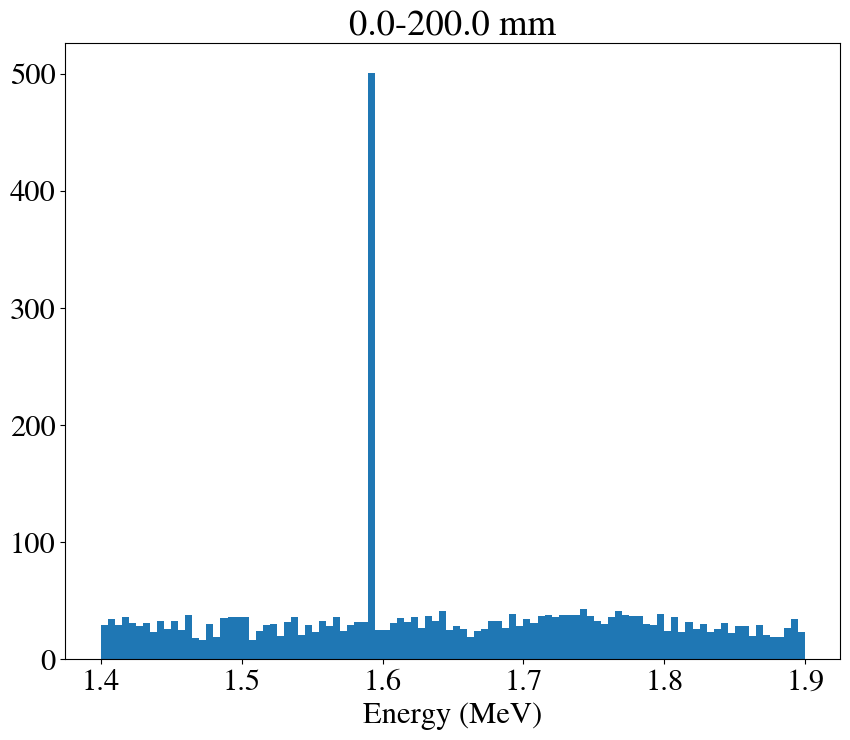

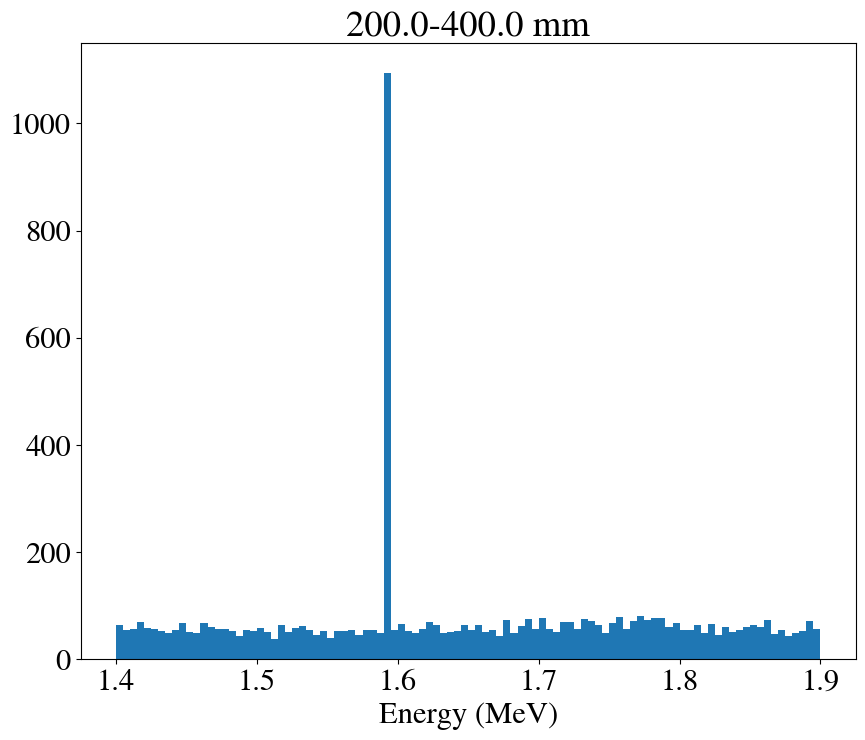

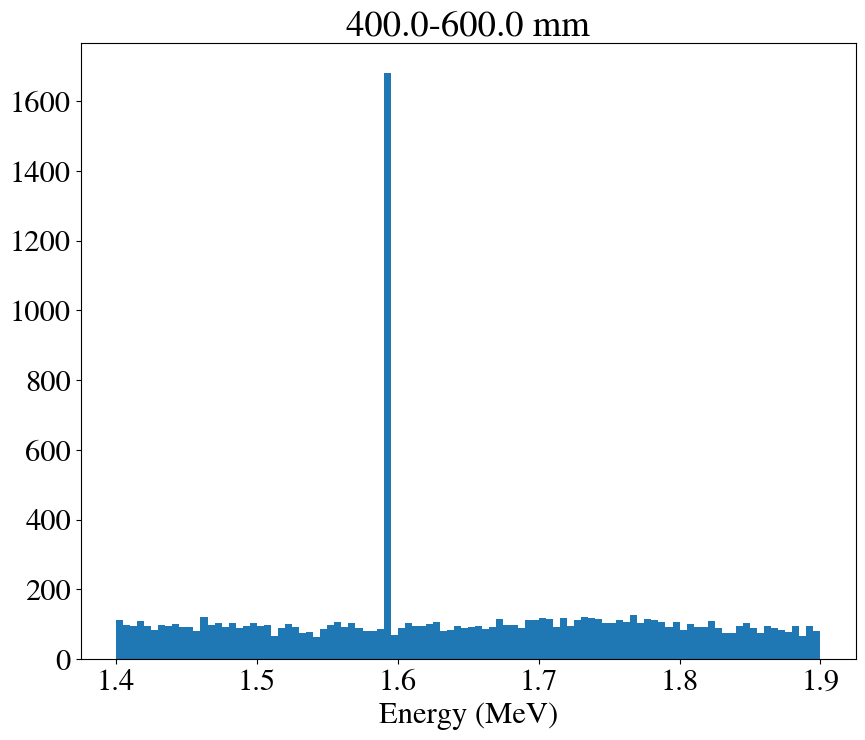

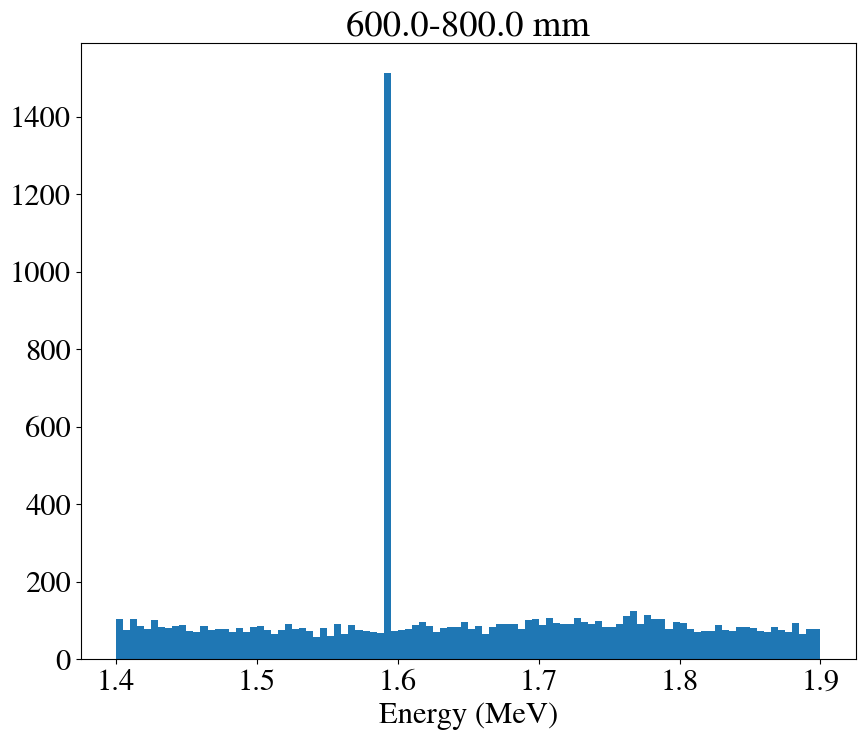

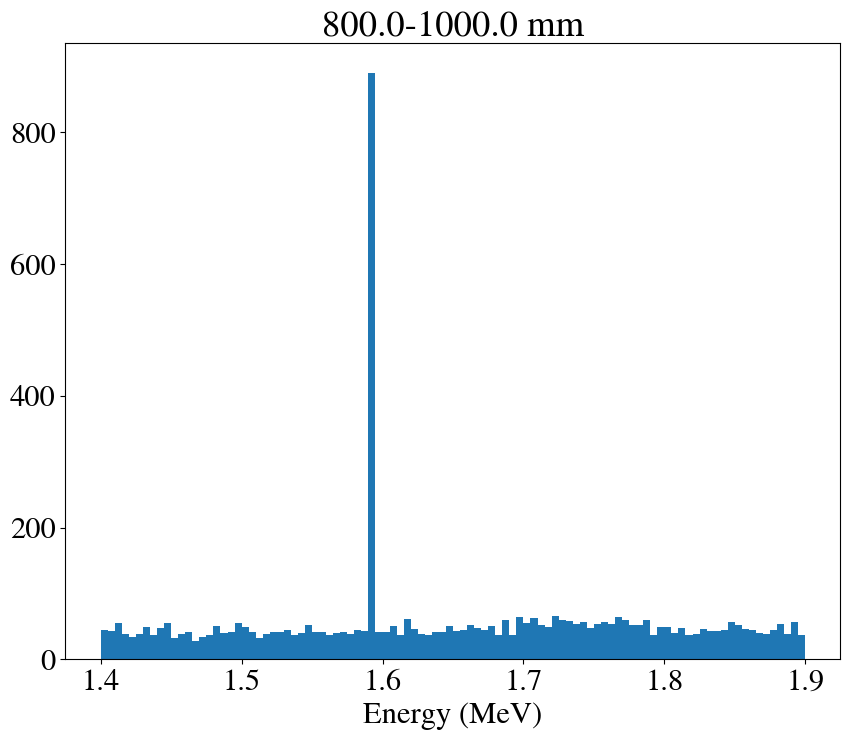

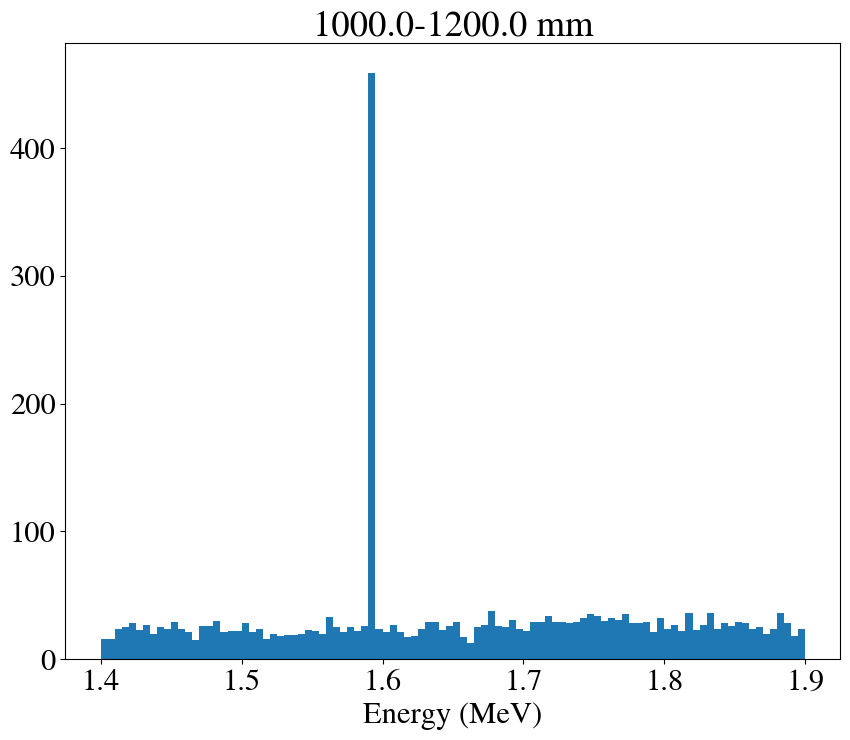

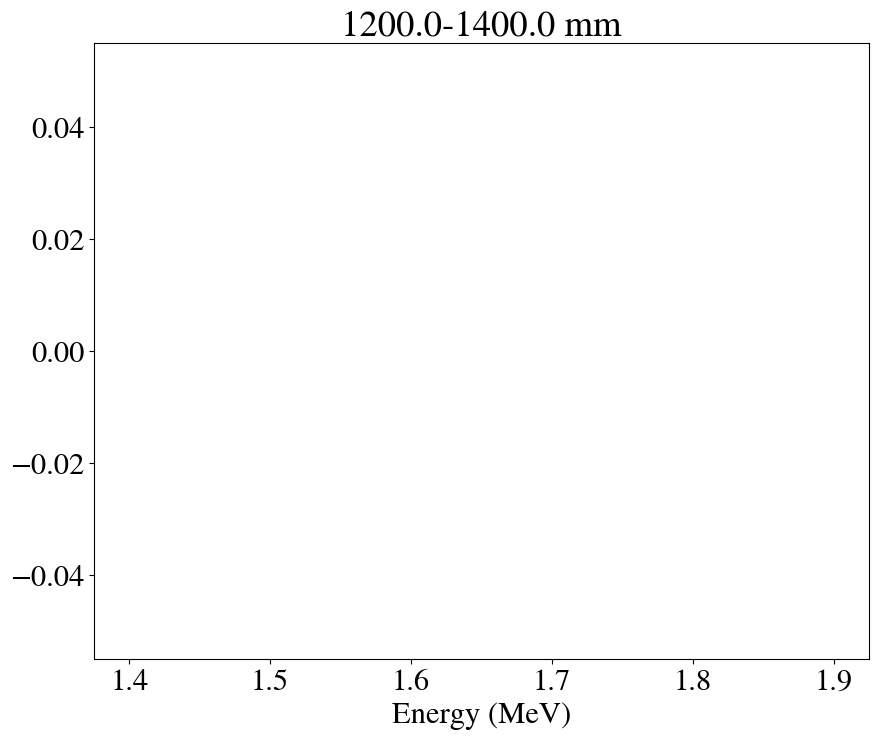

In [ ]:
for gr in nexus_groups:

    plt.hist(nexus_groups[gr], bins = 100, range = (1.4, 1.9))
    plt.title(f'{gr} mm')
    plt.xlabel('Energy (MeV)')
    plt.savefig(f'MC_truth_FOM/plots/nexus_{gr}.png')
    plt.show()

In [ ]:
from PIL import Image
import os

# Directory containing the plots
plot_dir = 'MC_truth_FOM/plots/'

# Get all image files in the directory
image_files = sorted([os.path.join(plot_dir, f) for f in os.listdir(plot_dir) if f.startswith('nexus_')], key=lambda x: float(os.path.basename(x).replace('.png', '').replace('nexus_', '').replace('-', '').split('.')[0]))
print(image_files)
# Create a list of images
images = [Image.open(img) for img in image_files]
print(images)
# Save as GIF
gif_path = f'{plot_dir}/animation_MC.gif'
images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

print(f"GIF saved at {gif_path}")

['MC_truth_FOM/plots/nexus_0.0-200.0.png', 'MC_truth_FOM/plots/nexus_200.0-400.0.png', 'MC_truth_FOM/plots/nexus_400.0-600.0.png', 'MC_truth_FOM/plots/nexus_600.0-800.0.png', 'MC_truth_FOM/plots/nexus_800.0-1000.0.png', 'MC_truth_FOM/plots/nexus_1000.0-1200.0.png', 'MC_truth_FOM/plots/nexus_1200.0-1400.0.png']
[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F1BE5B10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F1BE6EF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F1BE5BA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F1BE5720>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F1BE4460>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488EFD34AC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1000x800 at 0x1488F2107DC0>]
GIF saved at MC_truth_FOM/plots//animation_MC.gif
